# Intepretation

In [1]:
from config import plotly_id, plotly_key
import classifiers as clf

import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pickle

plotly.tools.set_credentials_file(username=plotly_id, api_key=plotly_key)

### Load Estimators

In [2]:
model_fws              = pd.read_pickle("../Data/model_fws.pkl")
model_smote_fws        = pd.read_pickle("../Data/model_smote_fws.pkl")
model_smote_fws_fs     = pd.read_pickle("../Data/model_smote_fws_fs.pkl")
model_smote_fws_fs_epa = pd.read_pickle("../Data/model_smote_fws_fs_epa.pkl")
y_labels               = pd.read_pickle("../Data/y_labels.pkl")

### Confusion Matrix

In [3]:
# best estimators of test sets
best_estimators = pd.concat([
    model_fws[             model_fws['Split'] == 'Test'],
    model_smote_fws[       model_smote_fws['Split'] == 'Test'],
    model_smote_fws_fs[    model_smote_fws_fs['Split'] == 'Test'],
    model_smote_fws_fs_epa[model_smote_fws_fs_epa['Split'] == 'Test']],
    ignore_index=True)

best_estimators

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,FWS,Dummy,{'strategy': 'most_frequent'},Test,0.765198,0.585528,0.765198,0.663414,"[[1737, 0, 0], [155, 0, 0], [378, 0, 0]]"
1,FWS,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.794714,0.736215,0.794714,0.734271,"[[1717, 1, 19], [146, 0, 9], [290, 1, 87]]"
2,FWS,Multinomial Naive Bayes,"{'alpha': 1.0, 'fit_prior': True}",Test,0.778414,0.760026,0.778414,0.740855,"[[1656, 62, 19], [122, 24, 9], [270, 21, 87]]"
3,FWS,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 200}",Test,0.725991,0.713093,0.725991,0.712318,"[[1446, 6, 285], [127, 3, 25], [174, 5, 199]]"
4,FWS,Decision Tree,"{'criterion': 'gini', 'min_impurity_decrease':...",Test,0.790308,0.730097,0.790308,0.725662,"[[1719, 0, 18], [147, 0, 8], [303, 0, 75]]"
5,FWS,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.765198,0.585528,0.765198,0.663414,"[[1737, 0, 0], [155, 0, 0], [378, 0, 0]]"
6,FWS,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 100}",Test,0.794714,0.736215,0.794714,0.734271,"[[1717, 1, 19], [146, 0, 9], [290, 1, 87]]"
7,SMOTE_FWS,Dummy,{'strategy': 'stratified'},Test,0.344934,0.627962,0.344934,0.414476,"[[607, 563, 567], [58, 45, 52], [116, 131, 131]]"
8,SMOTE_FWS,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.561674,0.732050,0.561674,0.616397,"[[1002, 438, 297], [61, 75, 19], [100, 80, 198]]"
9,SMOTE_FWS,Multinomial Naive Bayes,"{'alpha': 1.0, 'fit_prior': True}",Test,0.627313,0.748016,0.627313,0.670724,"[[1163, 313, 261], [63, 73, 19], [101, 89, 188]]"


In [4]:
# plot accuracy
accuracy = best_estimators.pivot(index='Classifier',columns='Data',values='Accuracy')
accuracy = accuracy[['FWS', 'SMOTE_FWS', 'SMOTE_FWS_FS', 'SMOTE_FWS_FS_EPA']]
accuracy

Data,FWS,SMOTE_FWS,SMOTE_FWS_FS,SMOTE_FWS_FS_EPA
Classifier,,,,
Ada Boost,0.794714,0.537885,0.577974,0.575771
Decision Tree,0.790308,0.672687,0.672687,0.672687
Dummy,0.765198,0.344934,0.325551,0.324229
K Nearest Neighbors,0.725991,0.730396,0.647137,0.644053
Logistic Regression,0.794714,0.561674,0.568722,0.581498
Multinomial Naive Bayes,0.778414,0.627313,0.607048,0.622026
Random Forest,0.765198,0.642291,0.632159,0.632599


In [5]:
# plot F1 scores
f1_scores = best_estimators.pivot(index='Classifier',columns='Data',values='F1 Score')
f1_scores = f1_scores[['FWS', 'SMOTE_FWS', 'SMOTE_FWS_FS', 'SMOTE_FWS_FS_EPA']]
f1_scores

Data,FWS,SMOTE_FWS,SMOTE_FWS_FS,SMOTE_FWS_FS_EPA
Classifier,,,,
Ada Boost,0.734271,0.597876,0.631160,0.628647
Decision Tree,0.725662,0.711030,0.711030,0.711030
Dummy,0.663414,0.414476,0.395385,0.388860
K Nearest Neighbors,0.712318,0.714027,0.668348,0.666038
Logistic Regression,0.734271,0.616397,0.623458,0.633893
Multinomial Naive Bayes,0.740855,0.670724,0.654395,0.665956
Random Forest,0.663414,0.683682,0.674733,0.674933


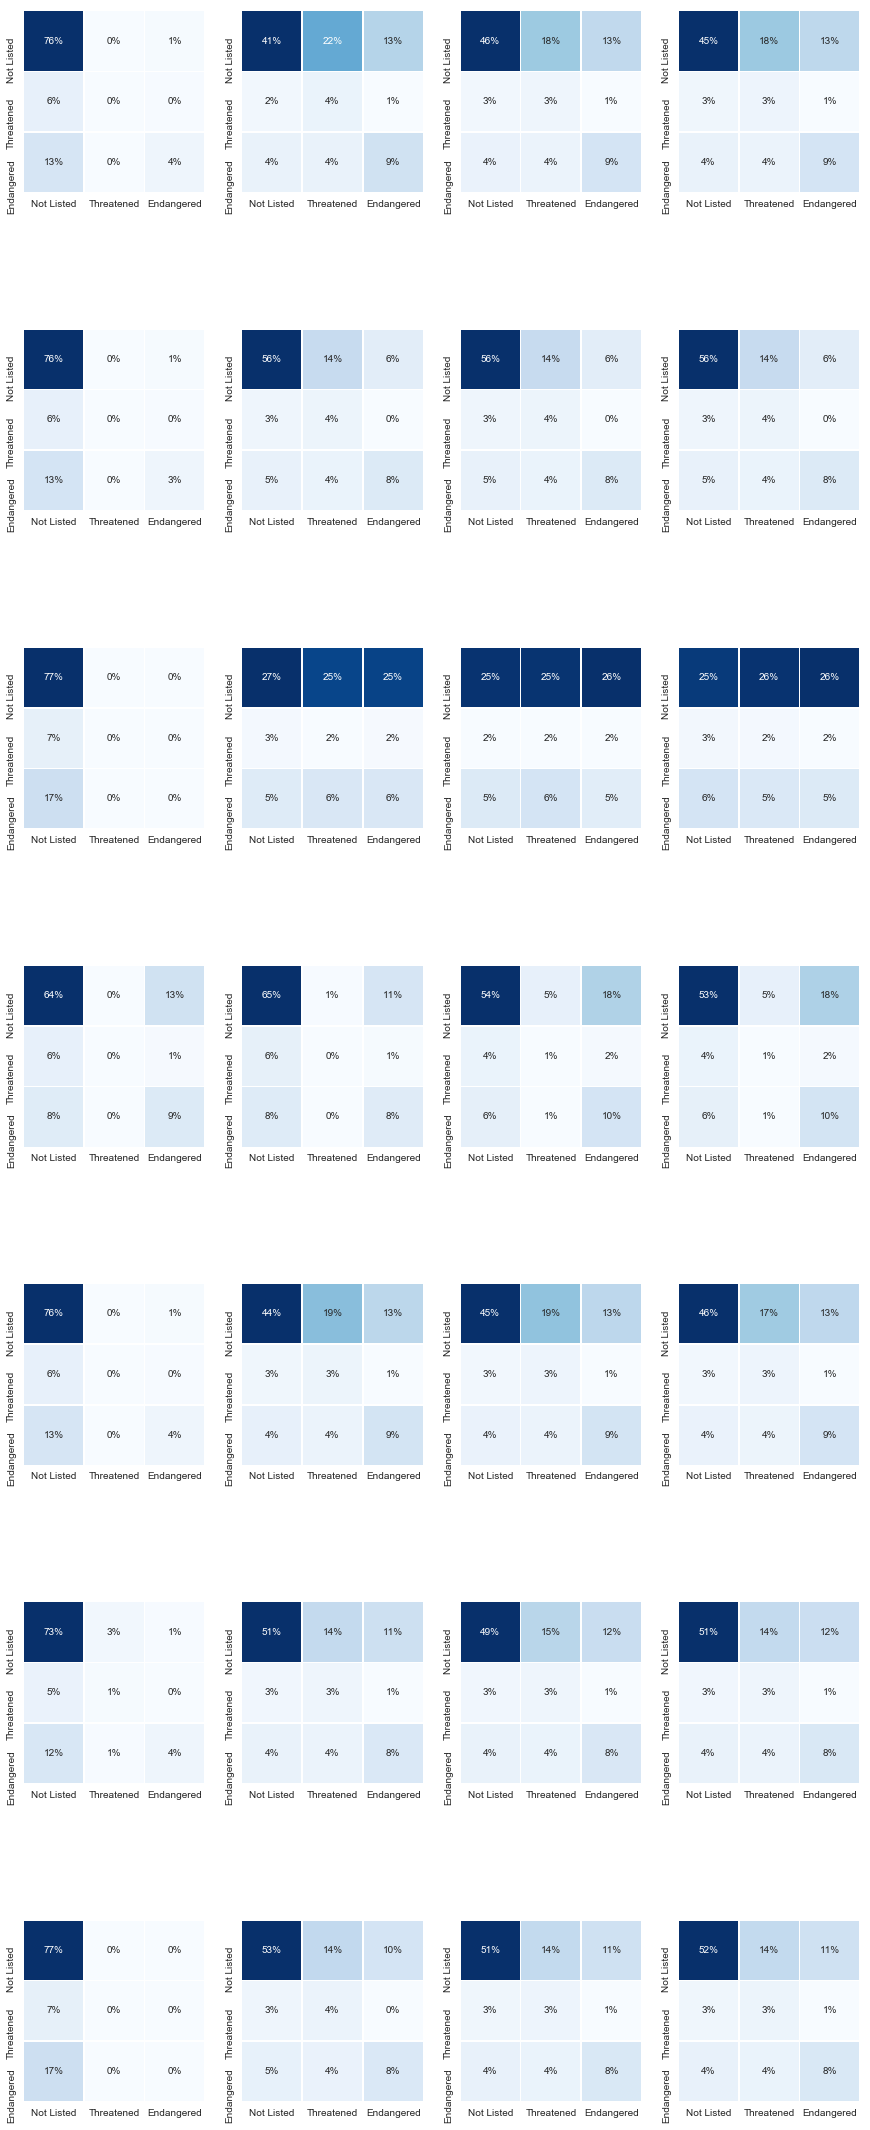

In [6]:
# plot confusion matrices
confusion_matrices = best_estimators.pivot(index='Classifier',columns='Data',values='Confusion Matrix')
confusion_matrices = confusion_matrices[['FWS', 'SMOTE_FWS', 'SMOTE_FWS_FS', 'SMOTE_FWS_FS_EPA']]
cm, axes = clf.plot_confusion_matrices(confusion_matrices, list(y_labels[0]))

### Feature Importance

In [ ]:
grid_searches[0]['Classifier'].best_estimator_.coef_[0]

In [ ]:
best_log_params = list(zip(X.columns, grid_searches[0]['Classifier'].best_estimator_.coef_[0]))
best_log_params.sort(key = lambda x: abs(x[1]), reverse=True)
best_log_params

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in best_log_params]

feature_weights = [abs(i[1]) for i in best_log_params]

# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xticks(rotation=90)

# Show plot
plt.show()

### Classifier Performance

In [ ]:
# create performance visualization in Plotly
hover_text  = []
color_range = []

for index, row in baseline.iterrows():
    hover_text.append(('Parameters: {params}<br>'+
                       'Split: {split}').format(params=row['Parameters'],
                                                split=row['Split']))
#    color_range.append(min(row['Dogs per Store'],120))

trace0 = go.Scatter(
    x=baseline['Accuracy'],
    y=baseline['F1 Score'],
    text=hover_text,
    mode='markers',
    marker=dict(
#        size=bcg_matrix['Stores'],
#        color=color_range,
        showscale=True,
        reversescale=True,
        colorbar=dict(
                title='Dogs Per Store'
            ),
        colorscale='RdBu'
    )
)

data = [trace0]
layout = go.Layout(
    title='Baseline',
    xaxis=dict(
        title='Model Performance Metric [Accuracy]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Model Performance Metric [F1 Score]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='endangered-species')